
# Assignment 1 (PS1)
Applied Machine Learning - SDU (Spring 2021)<br>
Instructor: Rahman Peimankar (abpe@mmmi.sdu.dk)

Due: February 25, 11:00.

The goal of this assignment is to revise the learning of the topics in Lesson 2 and Lesson 3, which are Python basics (SciPy, NumPy, Pandas, and Matplotlib) plus introduction to supervised learning.

# Part 1: Numpy

In [4]:
import numpy as np

Q1. Return the numpy version number.

In [5]:
def numpyImport():
    # YOUR CODE HERE
    return print('numpy: {}'.format(np.__version__))

Q2. Create a 1D numpy array of numbers from 0 to 50.

In [6]:
def createArray():
    length = 50
    # YOUR CODE HERE
    myArray=np.array(range(0,length))
    return myArray

Q3. Create a 3×3 numpy array of all True’s

In [7]:
def createArrayBoolean():
    # YOUR CODE HERE
    myArray=np.full((3,3),True)
    return myArray

Q4. Replace all odd numbers in the 1D array (length=50) with -1.

In [8]:
def replaceOdd():
    '''
    This function gets an array of size 50. 
    Then replace the odd numbers with -1 and return newArr as output.
    '''
    length = 50
    arr = np.arange(length)
    # YOUR CODE HERE
    newArr=arr
    for i in np.nditer(arr):
        if i % 2 == 1:     #if odd
            newArr[i]=-1
    return newArr

Q5. Convert a 1D array to a 2D array with 2 rows.

In [9]:
def reshapeArray():
    arr = np.arange(10)
    # YOUR CODE HERE
    arr = np.reshape(arr,(2,5))
    return arr

Q6. Stack arrays a and b vertically.

In [10]:
def stackArray():
    a = np.arange(10).reshape(2,-1)
    b = np.repeat(1, 10).reshape(2,-1)
    # YOUR CODE HERE
    stackArr=np.vstack((a,b))
    return stackArr

# Part 2: Pandas

In [11]:
import pandas as pd

Q7. Take a dictionary as input and create DataFrame namely **df**. 

In [12]:
def createDF():
    my_dict = {'A': [1, 4, 7], 'B': [2, 5, 8], 'C': [3, 6, 9]}
    # YOUR CODE HERE
    df=pd.DataFrame.from_dict(my_dict)
    return df

Q8. Complete the function below to access the value that is at index 2, in column 'A'. There are different solutions for this task. You may use 'loc', 'iloc', 'at', or 'iat' methods in Pandas.

In [13]:
def indexDF():
    df = createDF()
    # YOUR CODE HERE
    value=df.at[2,'A']
    return value

Q9. Select the first row of the above dataframe.

In [14]:
def selectRowDF():
    df = createDF()
    # YOUR CODE HERE
    row=df.loc[0]
    return row

Q10. Select the second row of the above dataframe.

In [15]:
def selectColDF():
    df = createDF()
    # YOUR CODE HERE
    col=df.loc[:,'B']
    return col

Q11. Find the second largest value of 'patient 1' for test 'B' and return it as **secondLargest**.

In [16]:
def nLargest():
    np.random.seed(1234)
    df = pd.DataFrame({'test': ['A', 'B', 'C'] * 3,
                       'patient 1': np.random.rand(9),
                       'patient 2': np.random.randint(0, 15, 9)})
    # YOUR CODE HERE
    bees=df.loc[df['test'] == 'B']
    twoLargest = bees['patient 1'].nlargest(2)
    secondLargest = twoLargest.iat[-1]
    return(secondLargest)
    

Q12. Compute the mean of every test for patient 1. Return the result as a dataframe with columns named 'test' and 'patient 1'.

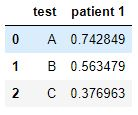

In [17]:
from IPython.display import Image
Image(filename='fig1.jpg',width=100, height=100)

In [18]:
def groupMean():
    np.random.seed(1234)
    df = pd.DataFrame({'test': ['A', 'B', 'C'] * 3,
                       'patient 1': np.random.rand(9),
                       'patient 2': np.random.randint(0, 15, 9)})
    # YOUR CODE HERE
    df_mean=df[['test','patient 1']].groupby('test').mean()
    return df_mean

Q13. Merge the two dataframes df1 and df2 (defined in the function below) based on the 'patient' and 'blood sugar'.

In [19]:
def mergeDF():
    np.random.seed(1234)
    df1 = pd.DataFrame({'patient': ['A', 'B', 'C'] * 3,
                        'blood sugar': ['high', 'medium', 'low'] * 3,
                        'platelet count': np.random.randint(150, 450, 9)})
    df2 = pd.DataFrame({'patient': ['A', 'C', 'D'] * 2,
                        'blood sugar': ['high', 'low'] * 3,
                        'platelet count': np.random.randint(150, 450, 6)})
    # YOUR CODE HERE
    df_merged = df1.merge(df2, on=['patient', 'blood sugar'])
    return df_merged

# Part 3: Matplotlib

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

*%matplotlib inline* is the magic command to plot the graph within the notebook itself. 

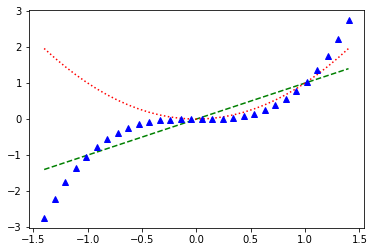

In [21]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--', x, x**2, 'r:', x, x**3, 'b^')
plt.show()

#### Q14. Change the line width, the dash style or the alpha level of the above plot. You can get help from the documentation. <br>
https://matplotlib.org/tutorials/introductory/pyplot.html

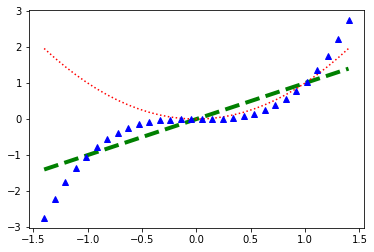

In [22]:
# YOUR CODE HERE
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, color='green', linewidth=4.0, linestyle='--')
plt.plot(x, x**2, 'r:')
plt.plot(x, x**3, 'b^')
plt.show()

Q15. Plot multiple figures using Matplotlib **subplot** method. You can use the numpy array **a** below to generate different arrays and plot a 2 by 2 subplot.  

In [23]:
a = np.linspace(-1.4, 1.4, 30)
a1 = a
a2 = a*2
a3 = a*3
a4 = a*4

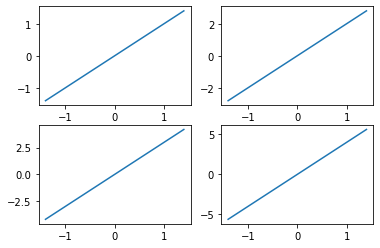

In [24]:
# YOUR CODE HERE
plt.subplot(221)
plt.plot(a,a1)
plt.subplot(222)
plt.plot(a,a2)
plt.subplot(223)
plt.plot(a,a3)
plt.subplot(224)
plt.plot(a,a4)

# Part 4: Supervised Learning
### k-Nearest Neighbors Implementation 
As we learnt in the lecture KNN is a very simple yet powerful technique to use in supervised learning problems. Here we would like to implement KNN from scratch instead of using scikit-learn package!<br>
In this exercis, you will use Iris Flower Dataset to predict the flower species given four different measurments as below:
* Sepal length in cm.
* Sepal width in cm.
* Petal length in cm.
* Petal width in cm.

But in order to implement KNN from scratch in Python, three steps should be considered:

1. Compute Euclidean Distance
2. Find Nearest Neighbors
3. Do the Predictions

**Step 1:** <br>
The straight line between two vectors (Euclidean distance) can be calculated using equation below:<br>

* $Euclidean Distance(a, b) = \sqrt{\sum_{i=1}^{n}(a_i-b_i)}$ <br>

where $a$ and $b$ are the first and the second vectors (rows of data) and $i$ is the index to each attribute (column in the dataset). **The smaller the value of Euclidean Distance, the more similar the two vetors are.** <br> 

Now, it is your turn to complete the function below to implement Euclidean Distance.<br>
**Improtant:** You are not allowed to use "*from sklearn.metrics import euclidean_distances*" ! 

In [25]:
from math import sqrt

2) In Part 4, Step 1, you are allowed to use numpy or list in your implementation of "euclideanDistance" function. However, you cannot use "euclidean_distances" function from scikit-learn library as mentioned in the description. In addition, the output of the test cell (after Hint) should be 0.0 and 2.83 not 0.0 and 2.0. Thanks to Isabella Glans Diethelm for pointing out this.

In [26]:
def euclideanDistance(row1, row2, nDim=2):
    # YOUR CODE HERE
    sumDist=0
    for i in range(nDim):
        sumDist+= (row1[i]-row2[i])**2
    euclidean_distance=sqrt(sumDist)
    return euclidean_distance

**Hint:** You may check your implementation by passing this toy dataset: <br>
dataset = [[1, 2], [3, 4]] <br>
The Euclidean distance between the two columns should be equal to 2.

In [27]:
dataset = [[1, 2], [3, 4]]
row0 = dataset[0]
for row in dataset:
    euclidean_distance = euclideanDistance(row0, row)
    print(euclidean_distance)

0.0
2.8284271247461903


In [28]:
# YOUR CODE HERE
#raise NotImplementedError()

**Step 2:**
* In order to find *k* nearest points for a new data sample, the Eudlidean distance between the the new sample and all the rows of the dataset should be first calculated (using the function in the previous step). Then, all the samples in the dataset should be sorted based on their distance to the new data. Finally, the top *k* can be returned as the most similar samples/neighbors. <br>
* This can be done by storing the index and the Euclidean distance of each sample of the dataset in a tuple (https://jakevdp.github.io/WhirlwindTourOfPython/06-built-in-data-structures.html) and sort the list of the tuples by their Euclidean distances and then extract the nearest neighbors. 
* Now it is your turn to complete the function below (*findNeighbors*) to implmenet these functionality. 

In [29]:
def findNeighbors(train_data, test_sample, numNeighbors,nDim=2):
    
    #1. Find distance to all neighbors
    # - Dist from new sample to each sample in the training set
    distances = list()
    for train_row in train_data:
        dist = euclideanDistance(test_sample, train_row, nDim=2)
        distances.append((train_row, dist))
    #print(distances)
    
    # YOUR CODE HERE
    sorted_distances=sorted(distances, key=lambda tup: tup[1])
    #print(sorted_distances)
    
    neighbors = list()
    for i in range(numNeighbors):
         # YOUR CODE HERE
        neighbors.append(sorted_distances[i][0])
    #print(neighbors)
    return neighbors
    

**Hint:** You may check your implementation by passing this toy dataset:<br>
dataset = [[2.8,2.6,1],[1.5,2.4,0],[1.1,2.8,0],[2.4,2.5,1]] (the last column represents the true classes or targets)<br>
As it is expected, the second row is the most similiar and the third row ([1.1,2.8,0]) is the second nearest neighbor to a new sample [1.55,2.44].

In [30]:
dataset = [[2.8,2.6,1],
           [1.5,2.4,0],
           [1.1,2.8,0],
           [2.4,2.5,1]]
neighbors = findNeighbors(dataset, [1.55,2.44], numNeighbors=2)
for n in neighbors:
    print(n)

[1.5, 2.4, 0]
[1.1, 2.8, 0]


**Step 3:** 
<br>Now that we have found the nearest neighbors, we can use them to make predictions on the new samples. Since our problem is a classification task, we simply need to return the most representative class among the neighbors. For this purpose, we need to count the number of each class among the neighbors. 

Now it is your turn to complete the function below (makePrediction) to implmenet these functionality. You should output a

In [31]:
def predictClassification(train_data, test_sample, numNeighbors, nDim=2):
    #Takes a maximum of 10 classes
    
    '''The inputs for this function are:
    1. train_data: the training dataset
    2. test_sample: the new test sample that we would like to make prediction for it.
    3. numNeighbors: number of neighbors used in the "findNeighbors" function.
    The output of this function is the predicted class for the test sample.'''
    
    
    neighbors = findNeighbors(train_data, test_sample, numNeighbors, nDim=2)
    
    # YOUR CODE HERE
    #count instances of neighbor classes
    class_counts=[0,0,0,0,0,0,0,0,0,0]        #index corresponds to class, value corresponds to counts
    #class_counts=np.zeros((1,nClass))
    for i in range(len(neighbors)):
        cur_class=int(neighbors[i][-1])
        class_counts[cur_class] += 1          #The class is stored in the last column
    #find class (index) with maximum count (value)
    predicted_class=class_counts.index(max(class_counts))  
    
    return predicted_class

**Hint:** You may check your implementation by passing this toy dataset:<br>
dataset = [[2.8,2.6,1],[1.5,2.4,0],[1.1,2.8,0],[2.4,2.5,1]]<br>
If we pass a new "test_sample" of [1.55,2.44], the "predict_classification" function should classify it as 0. (numNeighbors=2)

In [32]:
dataset = [[2.8,2.6,1],
           [1.5,2.4,0],
           [1.1,2.8,0],
           [2.4,2.5,1]]
print('The the new test sample {} is predicted as class {}'.format([1.55,2.44], 
                                                                   predictClassification(dataset, [1.55,2.44], 2)))

The the new test sample [1.55, 2.44] is predicted as class 0


**Put everything together:** Now we have all the elements for applying our own kNN algorithm on the *Iris Flower Dataset*. This should be done in the following steps:

a. Load the Iris Flower dataset using *scikit-learn*. (please name the loaded dataset as **data_iris**)<br>
b. Apply the three functions developed in the previous steps to find the 5 nearest neighbors ($K=5$) and make predictions on the test data.<br>
c. Report the accuracy of the kNN algorithm on the test dataset.<br>

In [33]:
from sklearn.datasets import load_iris
# YOUR CODE HERE
data_iris=load_iris()
#data_iris

Let's split the loaded dataset (**data_iris**) into 80% and 20% of train and test sets, respectively.<br>
Please name the outputs of "*train_test_split*" as *X_train, X_test, y_train, y_test*. 

**Improtant:** You should set "*random_state=42*" for the "*train_test_split*" methods/function. Otherwise, your answer will be graded as wrong!

In [34]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, y_train, y_test=train_test_split(data_iris.data, data_iris.target, random_state=42)


Let's implement a function for our kNN algorithm, which outputs a list of predictions for all the test samples. 

In [41]:
def kNearestNeighbors(train_data, train_target, test_data, test_target, numNeighbors, nDim=2):
    predictions = list()
    # these two lines add the train and test targets to the data. Please do not modify them!
    train = np.append(train_data, train_target.reshape(train_target.shape[0], 1), axis=1)
    test = np.append(test_data, test_target.reshape(test_target.shape[0], 1), axis=1)
    # YOUR CODE HERE
    for test_sample in test: 
        predictions.append(predictClassification(train, test_sample, numNeighbors, nDim))
    return predictions

Complete the function below to calculate the accuracy of the kNN algorithm!

In [42]:
def accCalculation(actual, predicted):
    '''This function gets the actual class labels and the predictions from "kNearestNeighbors" function as inputs. 
    The output is the accuracy in percentage.'''
    # YOUR CODE HERE
    #diff=
    #diff=np.empty([50,1])
    diff=[0]*len(actual)
    count=0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            count+=1
        else:
            diff[i]=1
            
    accuracy=count/len(actual)
    
    #prints...
    print('Pred.:', predicted)
    print('Actu.:', list(actual_classes))
    print('Diff.:', diff)
    return accuracy

predicted_classes=kNearestNeighbors(X_train, y_train, X_test, y_test, 5,4)
actual_classes=y_test
accCalculation(actual_classes, predicted_classes)

Pred.: [1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0]
Actu.: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0]
Diff.: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


0.8157894736842105

# End of PS1.
# Thank you!